# ARIMA

### Libraries

In [1]:
# import libraries

import joblib

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Data

In [2]:
# load negative, neutral and positive time series

negative_reviews_per_month = pd.read_csv('features/negative_reviews_per_month.csv', index_col=0, parse_dates=True)
neutral_reviews_per_month = pd.read_csv('features/neutral_reviews_per_month.csv', index_col=0, parse_dates=True)
positive_reviews_per_month = pd.read_csv('features/positive_reviews_per_month.csv', index_col=0, parse_dates=True)

In [3]:
# load sentiment time series

sentiment_per_month = pd.read_csv('features/sentiment_per_month.csv', index_col=0, parse_dates=True)

In [4]:
# load categories time series

sentiment_restaurants_per_month = pd.read_csv('features/sentiment_restaurants_per_month.csv', index_col=0, parse_dates=True)
sentiment_nightlife_per_month = pd.read_csv('features/sentiment_nightlife_per_month.csv', index_col=0, parse_dates=True)
sentiment_breakfast_brunch_per_month = pd.read_csv('features/sentiment_breakfast_brunch_per_month.csv', index_col=0, parse_dates=True)

### Stationarity

In [5]:
def stationarity_adf(time_series, extra_info=False):
    '''
    Check stationarity with Augmented Dickey-Fuller test
    '''
    adf_test = adfuller(time_series, autolag='AIC', regression='ct')
    print("ADF Test Results")
    print(f"p-value: {adf_test[1]}")
    if extra_info:
        print("Null Hypothesis: The series has a unit root (non-stationary)")
        print(f"ADF Statistic: {adf_test[0]}")
        print(f"Used Lags: {adf_test[2]}")
        print(f"Number of Observations: {adf_test[3]}")
        print(f"Critical Values: {adf_test[4]}")
        print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")
    is_stationary = adf_test[1] < 0.05
    print(f"Is the series stationary? {is_stationary}")
    print()

#### Negative reviews

ADF Test Results
p-value: 6.575588906851545e-10
Is the series stationary? True



<Axes: title={'center': 'Differenced Negative Reviews (Box-Cox)'}, xlabel='date'>

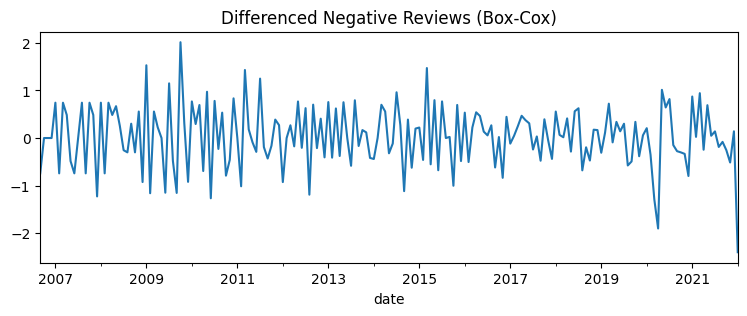

In [6]:
# differencing negative reviews to make it stationary

negative_box_cox = negative_reviews_per_month['box_cox'].dropna()
negative_box_cox_diff = negative_box_cox.diff().dropna()

stationarity_adf(negative_box_cox_diff)

negative_box_cox_diff.plot(figsize=(9, 3), title='Differenced Negative Reviews (Box-Cox)')

In [53]:
# save the differenced negative reviews

negative_box_cox_diff.to_csv('features/negative_box_cox_diff.csv')

#### Neutral reviews

ADF Test Results
p-value: 2.4868931153029963e-22
Is the series stationary? True



<Axes: title={'center': 'Differenced Neutral Reviews (Box-Cox)'}, xlabel='date'>

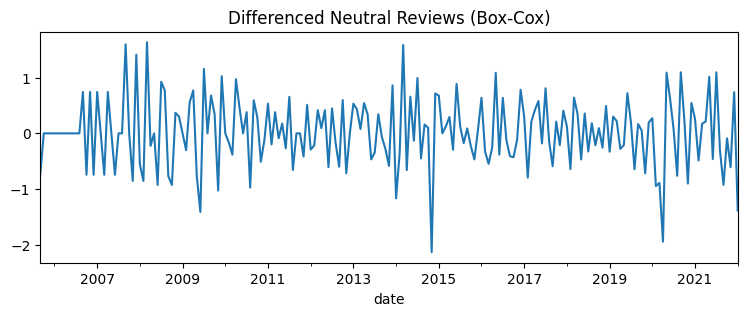

In [7]:
# differencing neutral reviews to make it stationary

neutral_box_cox = neutral_reviews_per_month['box_cox'].dropna()
neutral_box_cox_diff = neutral_box_cox.diff().dropna()

stationarity_adf(neutral_box_cox_diff)

neutral_box_cox_diff.plot(figsize=(9, 3), title='Differenced Neutral Reviews (Box-Cox)')

In [54]:
# save the differenced neutral reviews

neutral_box_cox_diff.to_csv('features/neutral_box_cox_diff.csv')

#### Positive reviews

ADF Test Results
p-value: 6.67479266691e-05
Is the series stationary? True



<Axes: title={'center': 'Differenced Positive Reviews (Box-Cox)'}, xlabel='date'>

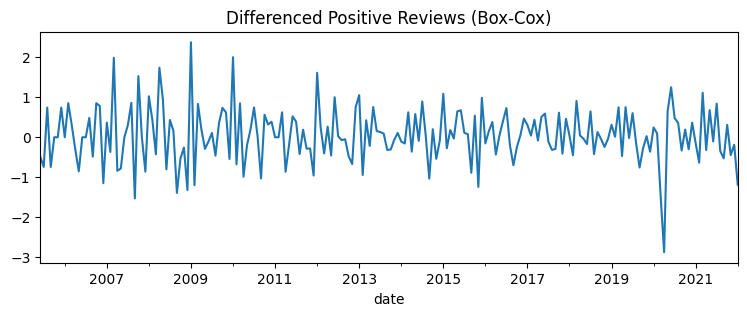

In [8]:
# differencing positive reviews to make it stationary

positive_box_cox = positive_reviews_per_month['box_cox'].dropna()
positive_box_cox_diff = positive_box_cox.diff().dropna()

stationarity_adf(positive_box_cox_diff)

positive_box_cox_diff.plot(figsize=(9, 3), title='Differenced Positive Reviews (Box-Cox)')

In [55]:
# save the differenced positive reviews

positive_box_cox_diff.to_csv('features/positive_box_cox_diff.csv')

#### Sentiment

ADF Test Results
p-value: 5.4195521103762684e-14
Is the series stationary? True



<Axes: title={'center': 'Differenced Sentiment (Box-Cox)'}, xlabel='date'>

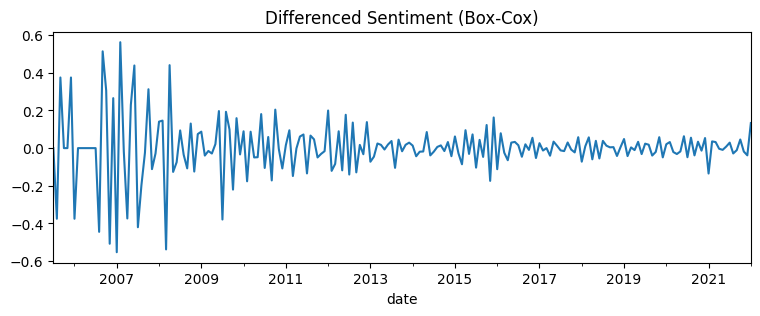

In [9]:
# differencing sentiment to make it stationary

sentiment_box_cox = sentiment_per_month['box_cox'].dropna()
sentiment_box_cox_diff = sentiment_box_cox.diff().dropna()
sentiment_box_cox_diff = sentiment_box_cox_diff.diff().dropna()

stationarity_adf(sentiment_box_cox_diff)

sentiment_box_cox_diff.plot(figsize=(9, 3), title='Differenced Sentiment (Box-Cox)')

In [56]:
# save the differenced sentiment

sentiment_box_cox_diff.to_csv('features/sentiment_box_cox_diff.csv')

#### Category sentiment

ADF Test Results
p-value: 6.337177706687687e-10
Is the series stationary? True



<Axes: title={'center': 'Differenced Restaurant Sentiment (Box-Cox)'}, xlabel='date'>

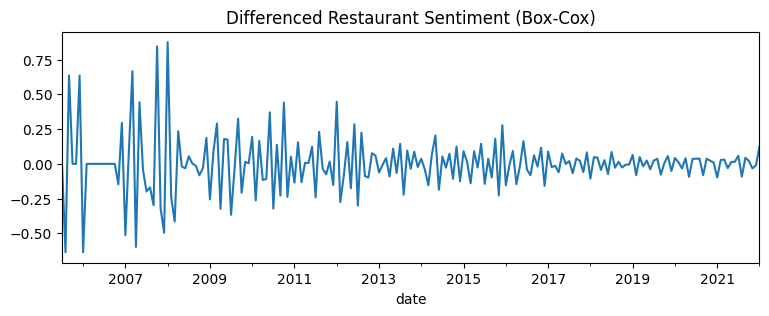

In [10]:
# differencing restaurant sentiment to make it stationary

restaurant_box_cox = sentiment_restaurants_per_month['box_cox'].dropna()
restaurant_box_cox_diff = restaurant_box_cox.diff().dropna()
restaurant_box_cox_diff = restaurant_box_cox_diff.diff().dropna()

stationarity_adf(restaurant_box_cox_diff)

restaurant_box_cox_diff.plot(figsize=(9, 3), title='Differenced Restaurant Sentiment (Box-Cox)')

In [57]:
# save the differenced restaurant sentiment

restaurant_box_cox_diff.to_csv('features/restaurant_box_cox_diff.csv')

ADF Test Results
p-value: 3.402708974003321e-10
Is the series stationary? True



<Axes: title={'center': 'Differenced Nightlife Sentiment (Box-Cox)'}, xlabel='date'>

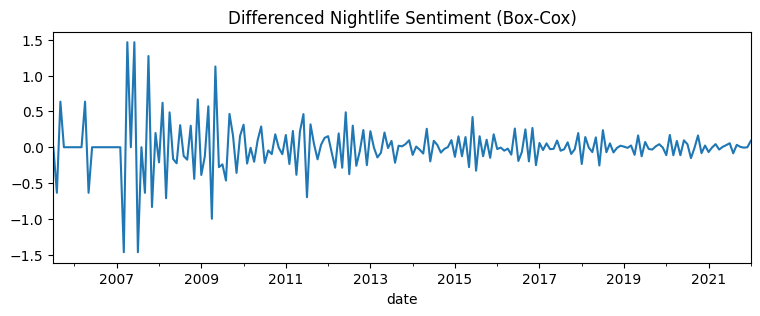

In [11]:
# differencing nightlife sentiment to make it stationary

nightlife_box_cox = sentiment_nightlife_per_month['box_cox'].dropna()
nightlife_box_cox_diff = nightlife_box_cox.diff().dropna()
nightlife_box_cox_diff = nightlife_box_cox_diff.diff().dropna()

stationarity_adf(nightlife_box_cox_diff)

nightlife_box_cox_diff.plot(figsize=(9, 3), title='Differenced Nightlife Sentiment (Box-Cox)')

In [58]:
# save the differenced nightlife sentiment

nightlife_box_cox_diff.to_csv('features/nightlife_box_cox_diff.csv')

ADF Test Results
p-value: 1.8931553357657198e-11
Is the series stationary? True



<Axes: title={'center': 'Differenced Breakfast & Brunch Sentiment (Box-Cox)'}, xlabel='date'>

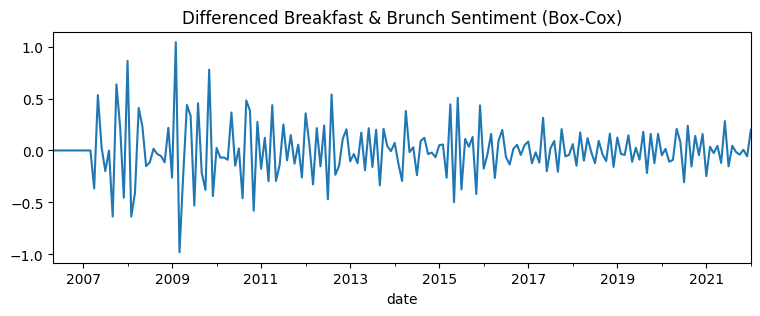

In [12]:
# differencing breakfast & brunch sentiment to make it stationary

breakfast_brunch_box_cox = sentiment_breakfast_brunch_per_month['box_cox'].dropna()
breakfast_brunch_box_cox_diff = breakfast_brunch_box_cox.diff().dropna()
breakfast_brunch_box_cox_diff = breakfast_brunch_box_cox_diff.diff().dropna()

stationarity_adf(breakfast_brunch_box_cox_diff)

breakfast_brunch_box_cox_diff.plot(figsize=(9, 3), title='Differenced Breakfast & Brunch Sentiment (Box-Cox)')

In [59]:
# save the differenced breakfast & brunch sentiment

breakfast_brunch_box_cox_diff.to_csv('features/breakfast_brunch_box_cox_diff.csv')

### Autocorrelation and partial autocorrelation

In [13]:
def acf_and_pacf_plots(time_series, title='ACF and PACF Plots'):
    '''
    Plot ACF and PACF plots for time series data
    '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    plot_acf(time_series, ax=axes[0], lags=40)
    plot_pacf(time_series, ax=axes[1], lags=40)

    axes[0].set_title('ACF')
    axes[1].set_title('PACF')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

#### Negative, neutral and positive reviews

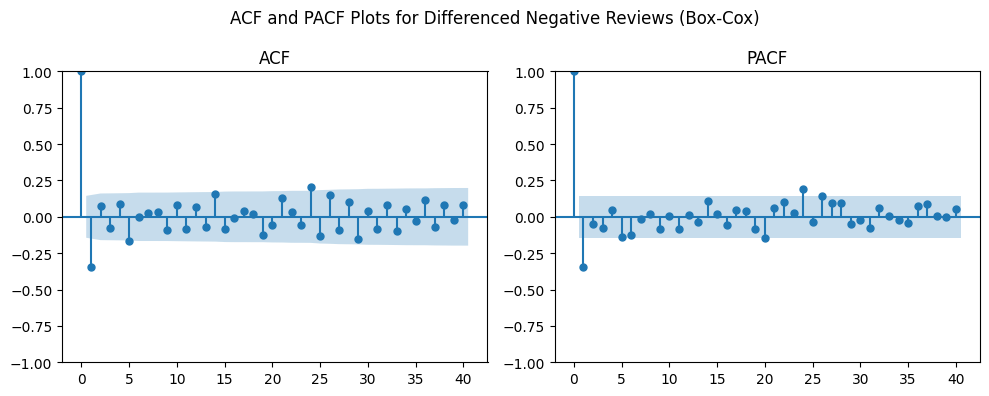

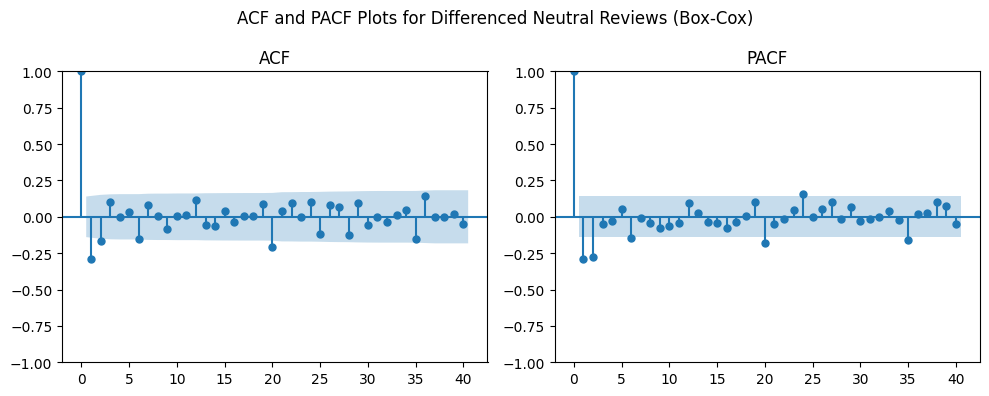

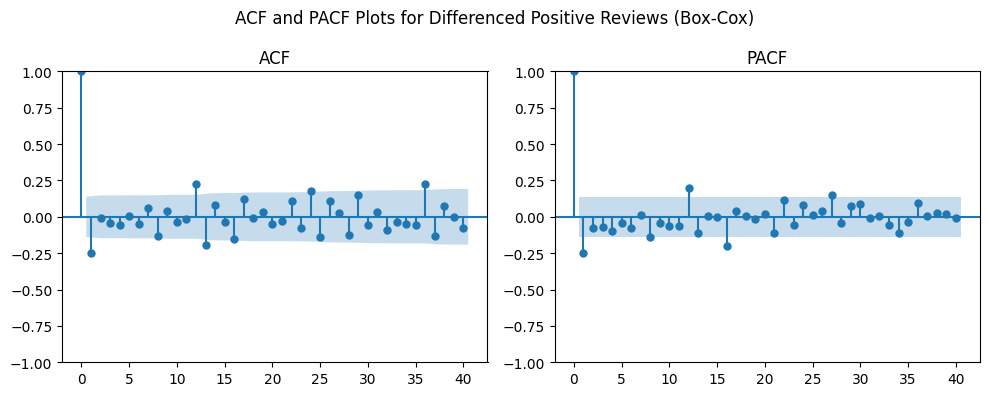

In [14]:
# ACF and PACF plots for negative, neutral and positive reviews

acf_and_pacf_plots(negative_box_cox_diff, title='ACF and PACF Plots for Differenced Negative Reviews (Box-Cox)')
acf_and_pacf_plots(neutral_box_cox_diff, title='ACF and PACF Plots for Differenced Neutral Reviews (Box-Cox)')
acf_and_pacf_plots(positive_box_cox_diff, title='ACF and PACF Plots for Differenced Positive Reviews (Box-Cox)')

#### Sentiment

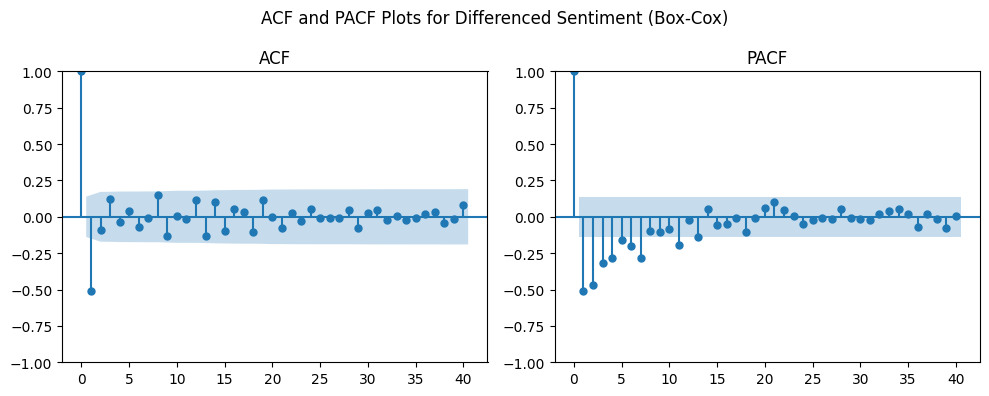

In [15]:
# ACF and PACF plots for sentiment per month

acf_and_pacf_plots(sentiment_box_cox_diff, title='ACF and PACF Plots for Differenced Sentiment (Box-Cox)')

#### Category sentiment

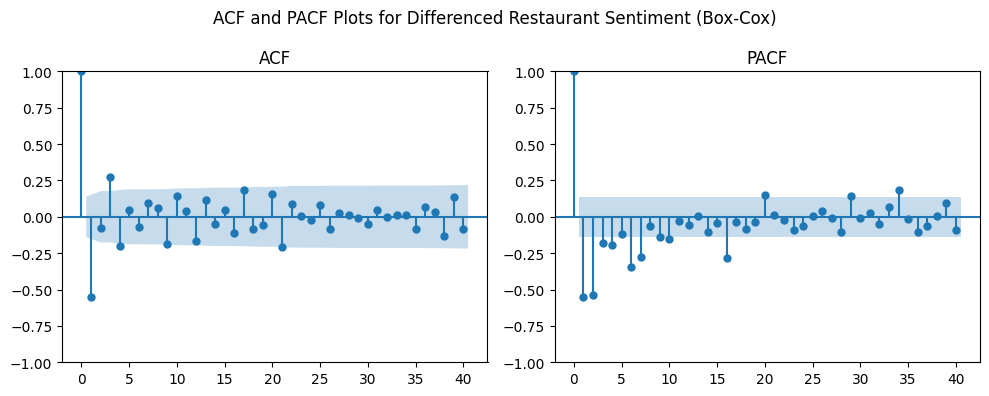

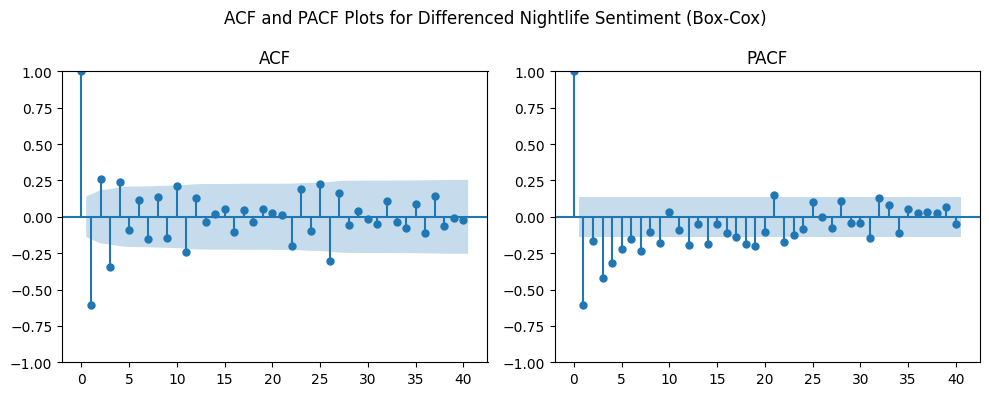

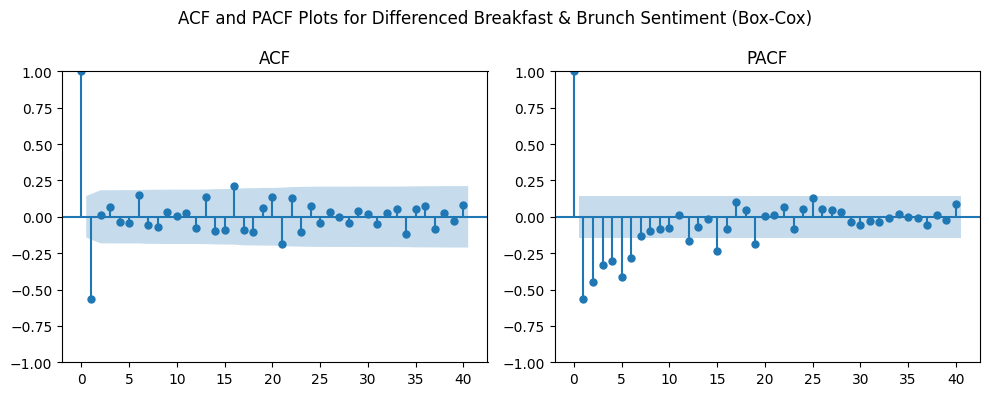

In [16]:
# ACF and PACF plots for categories sentiment per month

acf_and_pacf_plots(restaurant_box_cox_diff, title='ACF and PACF Plots for Differenced Restaurant Sentiment (Box-Cox)')
acf_and_pacf_plots(nightlife_box_cox_diff, title='ACF and PACF Plots for Differenced Nightlife Sentiment (Box-Cox)')
acf_and_pacf_plots(breakfast_brunch_box_cox_diff, title='ACF and PACF Plots for Differenced Breakfast & Brunch Sentiment (Box-Cox)')

### ARIMA modelling

In [17]:
# order values

p_values = range(0, 3)
q_values = range(0, 3)

In [18]:
def fit_arma_model(time_series, p_values=p_values, d=2, q_values=q_values):
    '''
    Fit ARMA model to time series data using AICc
    '''
    best_aic = float("inf")
    best_order = None
    best_model = None
    for p in p_values:
        for q in q_values:
            try:
                model = ARIMA(time_series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                print(f'ARMA({p},{q}) - AIC:{aic}')
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
                    best_model = model_fit
            except Exception as e:
                print(f'Error fitting ARMA({p},{q}): {e}')
                continue
    print(f'Best ARMA model order: {best_order} with AIC: {best_aic}')
    return best_model

#### Sentiment

In [19]:
# fit model

sentiment_model = fit_arma_model(sentiment_box_cox_diff)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(0,0) - AIC:264.04703813727735
ARMA(0,1) - AIC:38.29049427979811
ARMA(0,2) - AIC:-167.10923783167775
ARMA(1,0) - AIC:123.41285810614448


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(1,1) - AIC:-63.07707170581901


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(1,2) - AIC:-222.28410996482214
ARMA(2,0) - AIC:21.343321899959008


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(2,1) - AIC:-138.6660672628629
ARMA(2,2) - AIC:-270.2233422685752
Best ARMA model order: (2, 2) with AIC: -270.2233422685752


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


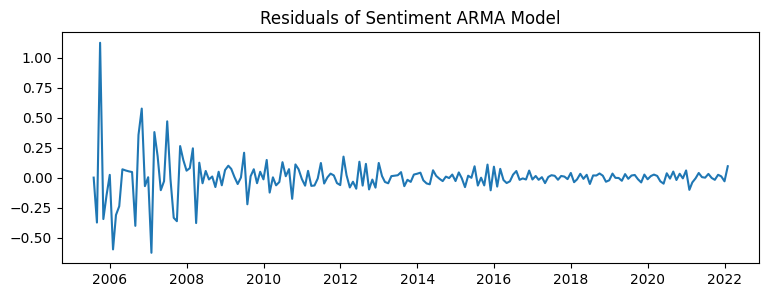

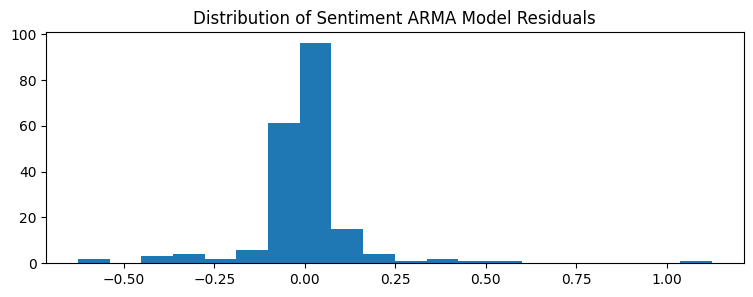

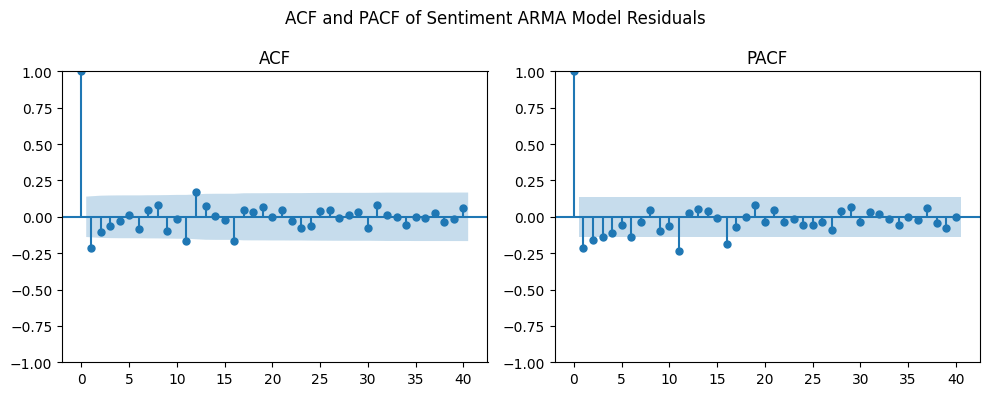

In [20]:
# model residuals

plt.figure(figsize=(9, 3))
plt.plot(sentiment_model.resid)
plt.title('Residuals of Sentiment ARMA Model')
plt.show()

plt.figure(figsize=(9, 3))
plt.hist(sentiment_model.resid, bins=20)
plt.title('Distribution of Sentiment ARMA Model Residuals')
plt.show()

acf_and_pacf_plots(sentiment_model.resid, title='ACF and PACF of Sentiment ARMA Model Residuals')

In [50]:
# save model

joblib.dump(sentiment_model, 'models/sentiment_arima.pkl')

['models/sentiment_arima.pkl']

#### Restaurant sentiment

In [22]:
# fit model

restaurant_model = fit_arma_model(restaurant_box_cox_diff)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(0,0) - AIC:394.1575362832007
ARMA(0,1) - AIC:166.8406323772003
ARMA(0,2) - AIC:-43.94097796040339
ARMA(1,0) - AIC:255.965217293953
ARMA(1,1) - AIC:58.29865047613673


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(1,2) - AIC:-110.70329576613126
ARMA(2,0) - AIC:106.1091055155872


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(2,1) - AIC:-59.366950235306376


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(2,2) - AIC:-180.31631930735645
Best ARMA model order: (2, 2) with AIC: -180.31631930735645


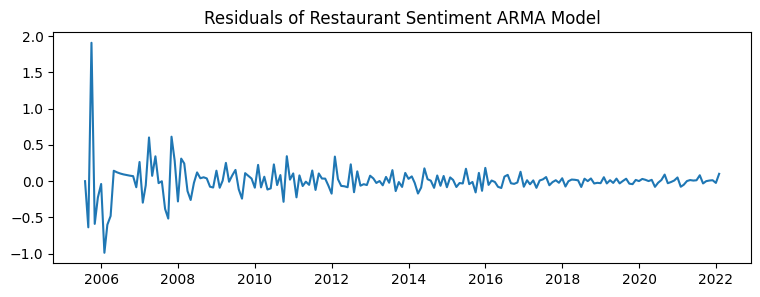

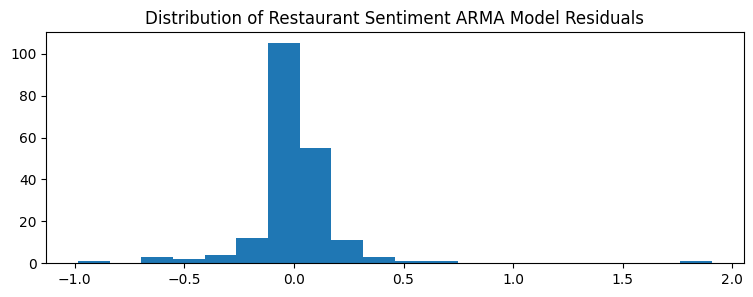

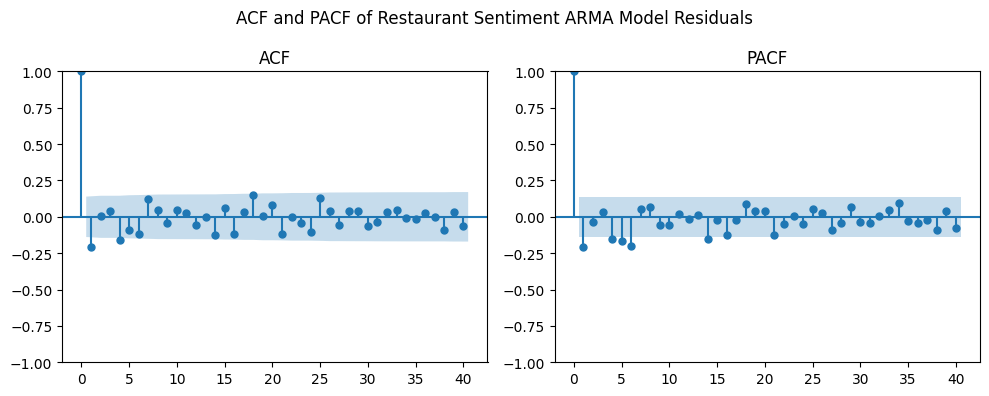

In [23]:
# model residuals

plt.figure(figsize=(9, 3))
plt.plot(restaurant_model.resid)
plt.title('Residuals of Restaurant Sentiment ARMA Model')
plt.show()

plt.figure(figsize=(9, 3))
plt.hist(restaurant_model.resid, bins=20)
plt.title('Distribution of Restaurant Sentiment ARMA Model Residuals')
plt.show()

acf_and_pacf_plots(restaurant_model.resid, title='ACF and PACF of Restaurant Sentiment ARMA Model Residuals')

In [49]:
# save model

joblib.dump(restaurant_model, 'models/restaurant_arima.pkl')

['models/restaurant_arima.pkl']

#### Nightlife sentiment

In [25]:
# fit model

nightlife_model = fit_arma_model(nightlife_box_cox_diff)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(0,0) - AIC:614.8514672575836
ARMA(0,1) - AIC:373.36034231228484
ARMA(0,2) - AIC:155.47572753169194
ARMA(1,0) - AIC:365.3345602564082


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(1,1) - AIC:198.31596000006755


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(1,2) - AIC:70.06314842967183
ARMA(2,0) - AIC:316.4940441145354


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(2,1) - AIC:179.43922949478238


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(2,2) - AIC:69.83179226359674
Best ARMA model order: (2, 2) with AIC: 69.83179226359674


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


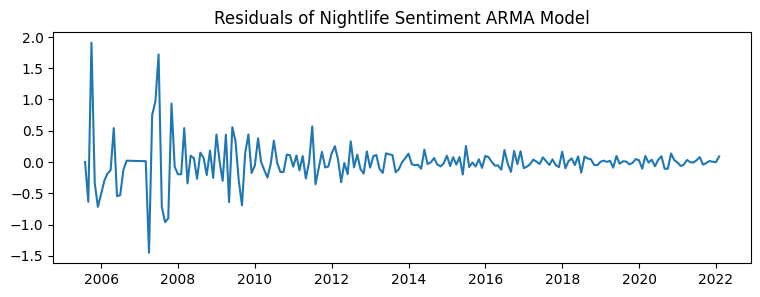

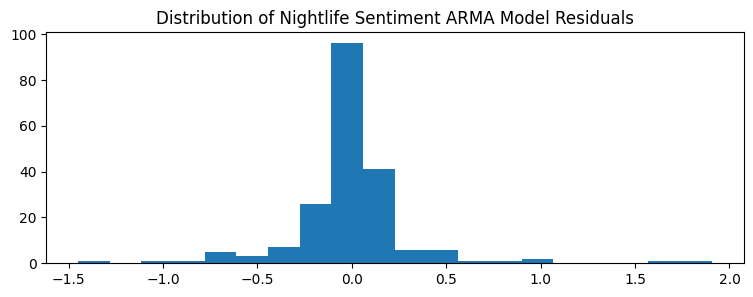

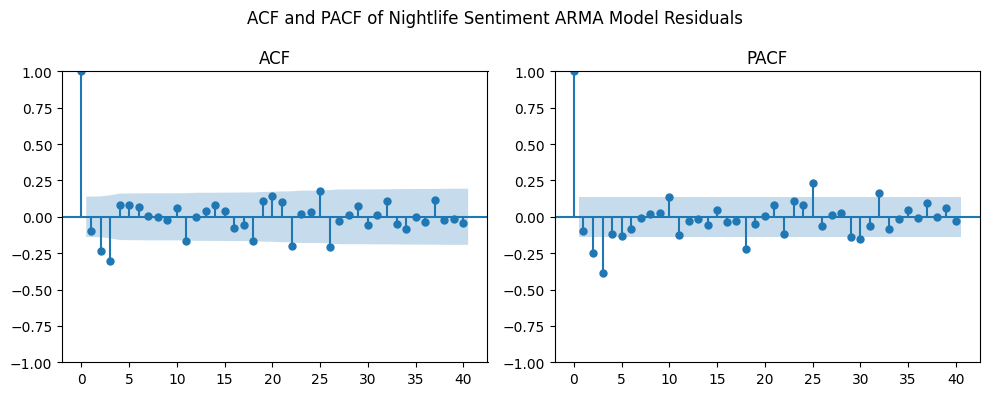

In [26]:
# model residuals

plt.figure(figsize=(9, 3))
plt.plot(nightlife_model.resid)
plt.title('Residuals of Nightlife Sentiment ARMA Model')
plt.show()

plt.figure(figsize=(9, 3))
plt.hist(nightlife_model.resid, bins=20)
plt.title('Distribution of Nightlife Sentiment ARMA Model Residuals')
plt.show()

acf_and_pacf_plots(nightlife_model.resid, title='ACF and PACF of Nightlife Sentiment ARMA Model Residuals')

In [48]:
# save model

joblib.dump(nightlife_model, 'models/nightlife_arima.pkl')

['models/nightlife_arima.pkl']

#### Breakfast & brunch sentiment

In [28]:
# fit model

breakfast_brunch_model = fit_arma_model(breakfast_brunch_box_cox_diff)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(0,0) - AIC:478.436793397987
ARMA(0,1) - AIC:258.6129061092616
ARMA(0,2) - AIC:57.09246978230502
ARMA(1,0) - AIC:324.6080123859641
ARMA(1,1) - AIC:143.75429435016963


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARMA(1,2) - AIC:-10.919650075782187
ARMA(2,0) - AIC:227.25368818974866
ARMA(2,1) - AIC:74.7074025785021


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(2,2) - AIC:-49.72129054266503
Best ARMA model order: (2, 2) with AIC: -49.72129054266503


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


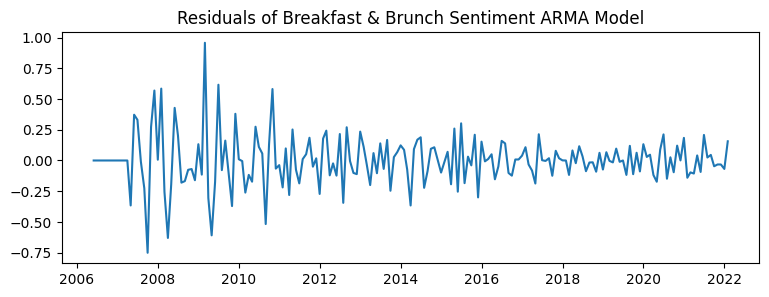

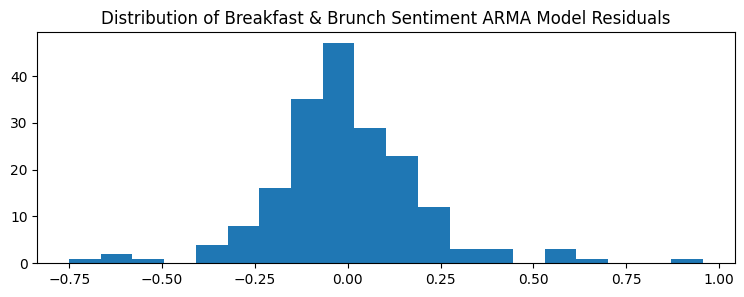

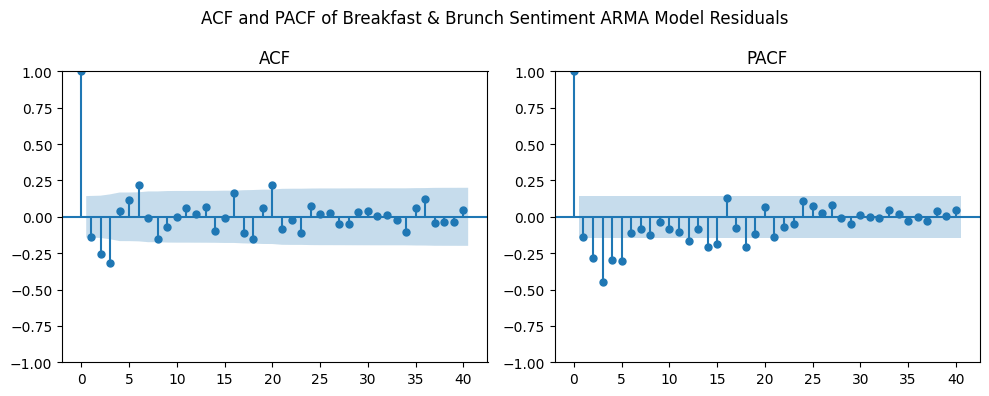

In [29]:
# model residuals

plt.figure(figsize=(9, 3))
plt.plot(breakfast_brunch_model.resid)
plt.title('Residuals of Breakfast & Brunch Sentiment ARMA Model')
plt.show()

plt.figure(figsize=(9, 3))
plt.hist(breakfast_brunch_model.resid, bins=20)
plt.title('Distribution of Breakfast & Brunch Sentiment ARMA Model Residuals')
plt.show()

acf_and_pacf_plots(breakfast_brunch_model.resid, title='ACF and PACF of Breakfast & Brunch Sentiment ARMA Model Residuals')

In [47]:
# save model

joblib.dump(breakfast_brunch_model, 'models/breakfast_brunch_arima.pkl')

['models/breakfast_brunch_arima.pkl']

### ARIMA-X modelling

In [31]:
def covid_event(date):
    '''
    Check if date is within COVID-19 event period
    '''
    start_date = pd.to_datetime('2020-01-31')
    end_date = pd.to_datetime('2022-12-31')
    return start_date <= date <= end_date

In [39]:
# create exogenous variables (COVID)

negative_exog_variables = pd.DataFrame(index=negative_box_cox_diff.index)
neutral_exog_variables = pd.DataFrame(index=neutral_box_cox_diff.index)
positive_exog_variables = pd.DataFrame(index=positive_box_cox_diff.index)

negative_exog_variables['covid'] = 0
neutral_exog_variables['covid'] = 0
positive_exog_variables['covid'] = 0

for date in negative_exog_variables.index:
    if covid_event(date):
        negative_exog_variables.loc[date, 'covid'] = 1

for date in neutral_exog_variables.index:
    if covid_event(date):
        neutral_exog_variables.loc[date, 'covid'] = 1
        
for date in positive_exog_variables.index:
    if covid_event(date):
        positive_exog_variables.loc[date, 'covid'] = 1

In [34]:
# order values

p_values = range(0, 3)
q_values = range(0, 3)

In [35]:
def fit_arimax_model(time_series, exog_variables, p_values=p_values, d=1, q_values=q_values):
    '''
    Fit ARIMAX model to time series data using AICc
    '''
    best_aic = float("inf")
    best_order = None
    best_model = None
    for p in p_values:
        for q in q_values:
            try:
                model = ARIMA(time_series, order=(p, d, q), exog=exog_variables)
                model_fit = model.fit()
                aic = model_fit.aic
                print(f'ARIMAX({p},{d},{q}) - AIC:{aic}')
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
                    best_model = model_fit
            except Exception as e:
                print(f'Error fitting ARIMAX({p},{d},{q}): {e}')
                continue
    print(f'Best ARIMAX model order: {best_order} with AIC: {best_aic}')
    return best_model

#### Negative reviews

In [36]:
# fit model

negative_arimax = fit_arimax_model(negative_box_cox_diff, negative_exog_variables)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARIMAX(0,1,0) - AIC:542.9298612335025
ARIMAX(0,1,1) - AIC:371.8911661815591
ARIMAX(0,1,2) - AIC:345.45415472239927
ARIMAX(1,1,0) - AIC:441.98358208534916
ARIMAX(1,1,1) - AIC:347.5481453464747


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARIMAX(1,1,2) - AIC:343.6413827425805
ARIMAX(2,1,0) - AIC:415.5056463512656


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARIMAX(2,1,1) - AIC:348.5692748454818


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMAX(2,1,2) - AIC:348.7156027189425
Best ARIMAX model order: (1, 2) with AIC: 343.6413827425805


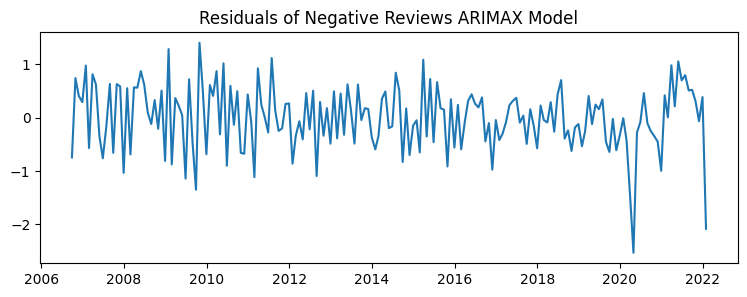

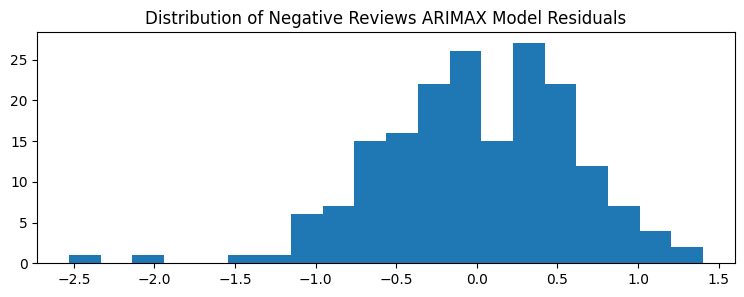

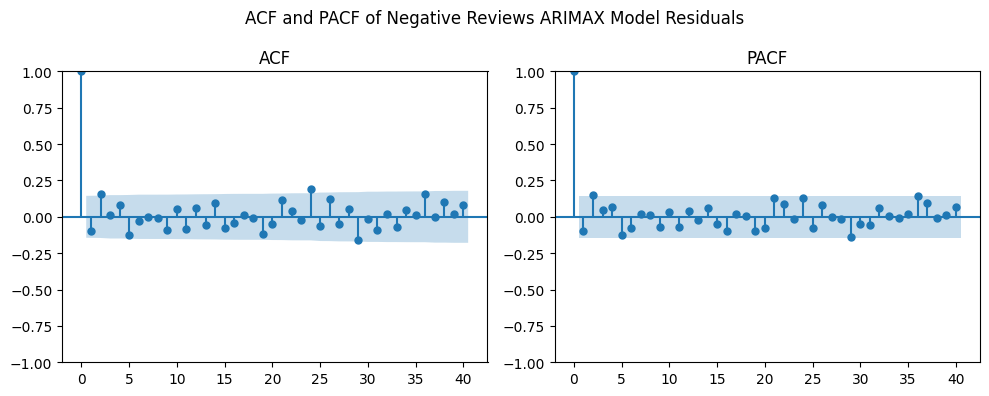

In [42]:
# model residuals

plt.figure(figsize=(9, 3))
plt.plot(negative_arimax.resid)
plt.title('Residuals of Negative Reviews ARIMAX Model')
plt.show()

plt.figure(figsize=(9, 3))
plt.hist(negative_arimax.resid, bins=20)
plt.title('Distribution of Negative Reviews ARIMAX Model Residuals')
plt.show()

acf_and_pacf_plots(negative_arimax.resid, title='ACF and PACF of Negative Reviews ARIMAX Model Residuals')

In [51]:
# model info

print(negative_arimax.summary())

                               SARIMAX Results                                
Dep. Variable:                box_cox   No. Observations:                  185
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -166.821
Date:                Mon, 20 May 2024   AIC                            343.641
Time:                        12:11:40   BIC                            359.716
Sample:                    09-30-2006   HQIC                           350.157
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
covid         -0.1469      0.149     -0.984      0.325      -0.440       0.146
ar.L1          0.5098      0.121      4.215      0.000       0.273       0.747
ma.L1         -1.9154      0.508     -3.774      0.0

In [37]:
# save model

joblib.dump(negative_arimax, 'models/negative_arimax.pkl')

['models/negative_arimax.pkl']

#### Neutral reviews

In [40]:
# fit model

neutral_arimax = fit_arimax_model(neutral_box_cox_diff, neutral_exog_variables)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARIMAX(0,1,0) - AIC:554.5235278586935
ARIMAX(0,1,1) - AIC:377.94470781835753


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMAX(0,1,2) - AIC:349.3754994801934
ARIMAX(1,1,0) - AIC:488.64640939432263


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARIMAX(1,1,1) - AIC:362.35913979427914
ARIMAX(1,1,2) - AIC:381.6608082055574


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users

ARIMAX(2,1,0) - AIC:431.88741383354864


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMAX(2,1,1) - AIC:347.9472279846717


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMAX(2,1,2) - AIC:349.1037232720843
Best ARIMAX model order: (2, 1) with AIC: 347.9472279846717


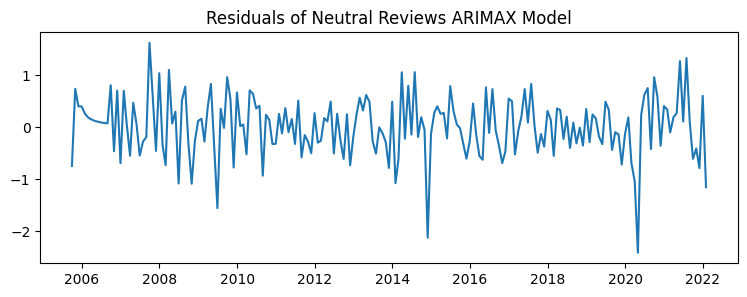

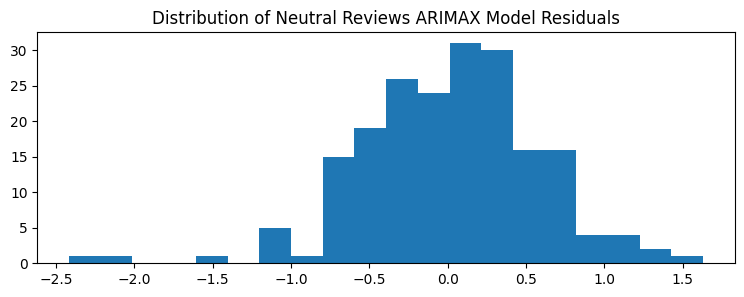

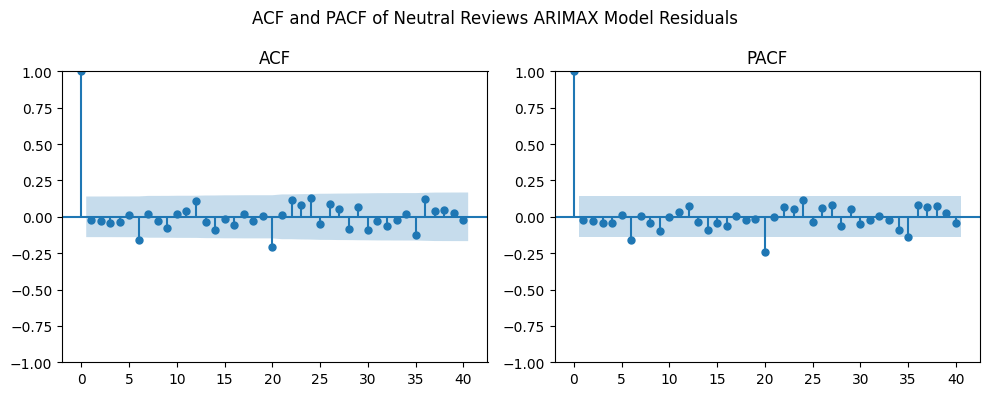

In [43]:
# model residuals

plt.figure(figsize=(9, 3))
plt.plot(neutral_arimax.resid)
plt.title('Residuals of Neutral Reviews ARIMAX Model')
plt.show()

plt.figure(figsize=(9, 3))
plt.hist(neutral_arimax.resid, bins=20)
plt.title('Distribution of Neutral Reviews ARIMAX Model Residuals')
plt.show()

acf_and_pacf_plots(neutral_arimax.resid, title='ACF and PACF of Neutral Reviews ARIMAX Model Residuals')

In [52]:
# model info

print(neutral_arimax.summary())

                               SARIMAX Results                                
Dep. Variable:                box_cox   No. Observations:                  197
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -168.974
Date:                Mon, 20 May 2024   AIC                            347.947
Time:                        12:12:37   BIC                            364.338
Sample:                    09-30-2005   HQIC                           354.583
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
covid         -0.1145      0.073     -1.559      0.119      -0.258       0.029
ar.L1         -0.3818      0.075     -5.068      0.000      -0.529      -0.234
ar.L2         -0.2875      0.071     -4.039      0.0

In [41]:
# save model

joblib.dump(neutral_arimax, 'models/neutral_arimax.pkl')

['models/neutral_arimax.pkl']

#### Positive reviews

In [44]:
# fit model

positive_arimax = fit_arimax_model(positive_box_cox_diff, positive_exog_variables)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARIMAX(0,1,0) - AIC:598.8914952504446
ARIMAX(0,1,1) - AIC:424.32535814921584


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMAX(0,1,2) - AIC:410.4011245496504
ARIMAX(1,1,0) - AIC:513.4640190814197


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Pr

ARIMAX(1,1,1) - AIC:412.88311028622195


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Utilizad

ARIMAX(1,1,2) - AIC:402.0001992249181
ARIMAX(2,1,0) - AIC:484.76909591726525
ARIMAX(2,1,1) - AIC:413.35176355779345


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive par

ARIMAX(2,1,2) - AIC:415.9438613594774
Best ARIMAX model order: (1, 2) with AIC: 402.0001992249181


c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


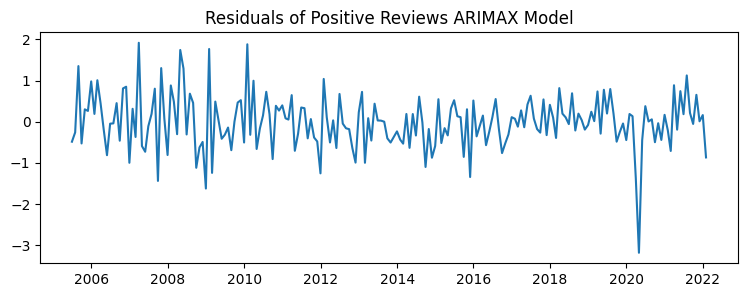

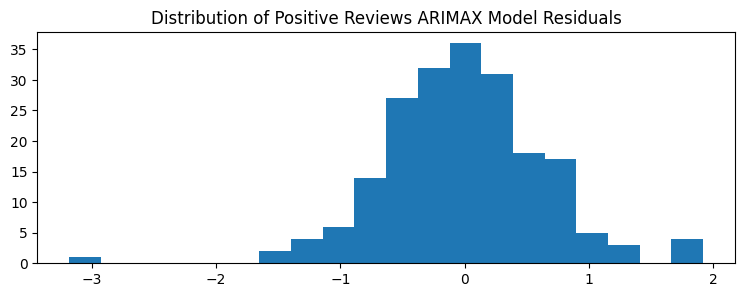

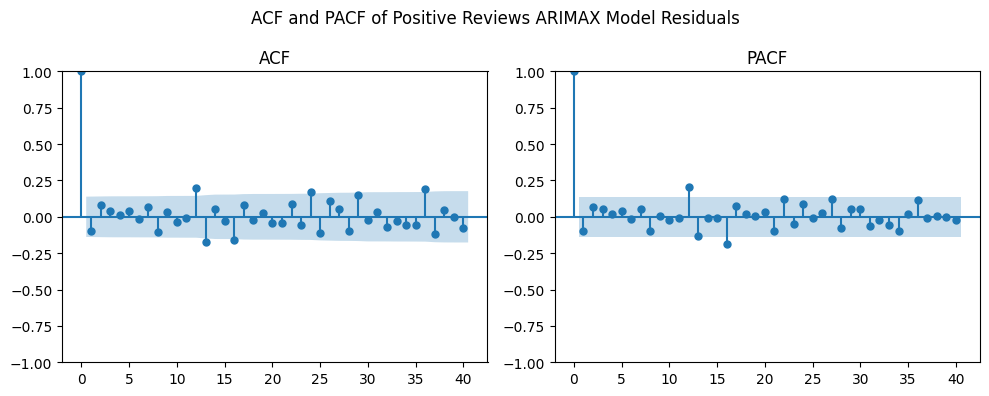

In [45]:
# model residuals

plt.figure(figsize=(9, 3))
plt.plot(positive_arimax.resid)
plt.title('Residuals of Positive Reviews ARIMAX Model')
plt.show()

plt.figure(figsize=(9, 3))
plt.hist(positive_arimax.resid, bins=20)
plt.title('Distribution of Positive Reviews ARIMAX Model Residuals')
plt.show()

acf_and_pacf_plots(positive_arimax.resid, title='ACF and PACF of Positive Reviews ARIMAX Model Residuals')

In [46]:
# save model

joblib.dump(positive_arimax, 'models/positive_arimax.pkl')

['models/positive_arimax.pkl']